# Extrinsic Camera Calibration 

Sensor calibration is one of the most important aspects of building a robot. Different sensors have differnt callibration procedures. For this chapter, we would be focusing on extrinsic camera calibration. 

Refer back to the ['From Pixels to Meters'](https://thomasfermi.github.io/Algorithms-for-Automated-Driving/LaneDetection/InversePerspectiveMapping.html) chapter. If you did the excersices of that chapter, you may recall that to covert the lane line pixels detected by the neural network to meters, the rotation matrix $\mathbf{R_{cr}}$ was required that described how the camera was oriented with respect to the road. $\mathbf{R_{cr}}$ was very easy to obtain through the CARLA simulator. But this may not be that easy in real life to obtain $\mathbf{R_{cr}}$. The road is also not flat in real life mostly as the road can be banked, elevated or just uneven and therefore, the orientaion of the car and the camera keeps changing with respect to the flat road frame. The orientation of car and camera may also change with respect to the road if car breaks are hit hard or due to the car suspension. 

## Vanishing Point Method

We know that the rail tracks or the lane lines are mostly parallel, however, if we take an image of the track or road from a camera, we would observe that the track lines or the lanes are not parallel in the image. The point where these lines intersect in an image is known as the vanishing point.

```{figure} images/vanishing_point.png
---
width: 60%
name: vanishing_point_carla
---
```

```{figure} images/Vanishing_point.svg
---
width: 70%
name: vanishing_point
---
```

We know that, in the world co-ordinate system, these parallel lines won't ever intersect. So we assusme that the vanishing point is at infinity. This can be represented by 

$$ \mathbf{Z_{\infty}} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} $$

$ \mathbf{Z_{\infty}}$ is the vanishing point in z-direction in homogeneous coordinates. $Z$ direction is defined by the direction of the lanes (forward).

Now, let the co-ordinates of vanishing point in image space be $\mathbf{u}$ and $\mathbf{v}$ which can be represented by $\mathbf{p_{\infty}}$. We know that 

$$
    \lambda \mathbf{p_{\infty}} = \mathbf{K} \begin{pmatrix} \mathbf{R} | \mathbf{t} \end{pmatrix} \mathbf{Z_{\infty}}
$$

$$
    \lambda \mathbf{p_{\infty}} = \mathbf{K} \begin{pmatrix} R_{xx}  R_{xy}  R_{xz}  t_x \\ R_{yx}  R_{yy}  R_{yz}  t_y \\ R_{zx}  R_{zy}  R_{zz}  t_z \end{pmatrix} \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}
$$


Now, multiplying transformation matrix with $\mathbf{Z_{\infty}}$ will eliminate 1st, 2nd and 4th columnns leaving us with only 3rd column whose values are $\mathbf{R_{xz}}$, $\mathbf{R_{yz}}$  and $\mathbf{R_{zz}}$. Let us denote this by $\mathbf{r_{3}}$.

Solving for $\mathbf{r_{3}}$, we get

$$
    \lambda \mathbf{p_{\infty}} = \mathbf{K} \mathbf{r_{3}}
$$


Since columns of a rotation matrix are vectors with length 1 (unit vectors). Thus, $\lambda$ equals to $\frac{1} {\| \mathbf{K}^{-1} \mathbf{p_{\infty}}\| }$. Therefore, 

$$
    \mathbf{r_{3}} = \frac{\mathbf{K}^{-1} \mathbf{p_{\infty}}} {\| \mathbf{K}^{-1} \mathbf{p_{\infty}}\| }
$$



With the vanishing point method, we are able to only recover $\mathbf{r_{3}}$ which would be able to yield **yaw** and **pitch** of the camera. It makes intuitive sense that the vanishing point method is not able to recover **roll** and **translation** becuse vanishing point is not affected by these two! Imaging looking at a star. The star's position is only going to change if you change the yaw and pitch of your head and is not affected by roll and translation. The stars move with you when you are travelling in the car, therefore no change. Same goes with roll.


```{figure} images/car_rpy.svg
---
width: 60%
name: coordinate_system
---
```

Let's understand this by an example from CARLA. 

### Changing Roll

````{tabbed} roll = 20°
```{figure} images/images_vp/p-0-y-0-r-20.png
---
width: 90%
name: roll_20
---
```
````

````{tabbed} roll = 0°
```{figure} images/images_vp/p-0-y-0.png
---
width: 90%
name: roll_0 
---
```
````

````{tabbed} roll = -20°
```{figure} images/images_vp/p-0-y-0-r--20.png
---
width: 90%
name: roll_minus_20
---
```
````

See that the vanishng point didn't change. Similarly, let's see if this also holds true for translation. 


### Changing Translation

````{tabbed} translation = 2 m
```{figure} images/images_vp/trans-2.png
---
width: 90%
name: translation_2
---
```
````

````{tabbed} translation = 0 m
```{figure} images/images_vp/p-0-y-0.png
---
width: 90%
name: translation_0
---
```
````

````{tabbed} translation = -2 m
```{figure} images/images_vp/trans--2.png
---
width: 90%
name: translation_minus_2
---
```
````

You can see that the vanishing point lies at same position for all the above images. This shows that roll and translation won't affect the vanishing point.


Now let's see the affect of changing pitch and yaw.

### Changing Pitch

````{tabbed} pitch = 5°
```{figure} images/images_vp/p--5-y-0.png
---
width: 90%
name: pitch_5
---
```
````

````{tabbed} pitch = 0°
```{figure} images/images_vp/p-0-y-0.png
---
width: 90%
name: pitch_0
---
```
````

````{tabbed} pitch = -5°
```{figure} images/images_vp/p-5-y-0.png
---
width: 90%
name: pitch__minus_5
---
```


### Changing Yaw


````{tabbed} yaw = 5°
```{figure} images/images_vp/p-0-y-10.png
---
width: 90%
name: yaw_10
---
```
````

````{tabbed} yaw = 0°
```{figure} images/images_vp/p-0-y-0.png
---
width: 90%
name: yaw_0
---
```
````

````{tabbed} yaw = -5°
```{figure} images/images_vp/p-0-y--10.png
---
width: 90%
name: yaw_minus_10
---
```

The vanishing point shifted in this case. 

We can assume roll ($\gamma$) = 0. Rotation matrix, $\mathbf{r_{3}}$ is represented in terms of $\alpha, \beta, \gamma$ as 

$$
    \mathbf{r_{3}} = \begin{pmatrix} \sin(\alpha)\sin(\beta) \\ \cos(\beta) \\ \cos(\alpha)\sin(\beta) \end{pmatrix}
$$

Therefore, 

$$
    \mathbf{r_{3}} = \begin{pmatrix} \sin(\alpha)\sin(\beta) \\ \cos(\beta) \\ \cos(\alpha)\sin(\beta) \end{pmatrix} = \frac{\mathbf{K}^{-1} \mathbf{p_{\infty}}} {\| \mathbf{K}^{-1} \mathbf{v_{\infty}}\| }
$$

Solving for $\alpha$ and $\beta$ we get:

$$
    \alpha = \tan^{-1}\frac{\mathbf{r_{3}}(1)}{\mathbf{r_{3}}(3)}
$$

$$
    \beta = \cos^{-1}{\mathbf{r_{3}}(2)}
$$

We have now derived pitch and yaw from vanishing point! Now let's dive into the code.

# Implementation

In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

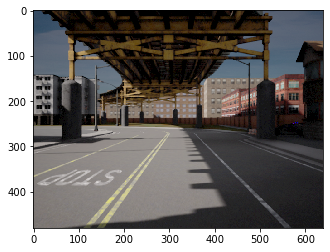

In [2]:
img = cv2.imread('images/test.png')[:, :, (2, 1, 0)]
plt.imshow(img)

Define the lane line coordinates manually. You may use the lane detection neural network that was trained in earlier chapters. This image was collected from CARLA having a ptch of 0 degrees and yaw of 0.25 degrees. 

One thing to note here is, we are finding orrientation of camera with respect to the car and not car with respect to the lane before calibrating. Therefore, the car needs to be alligned with respect to the lane line. Therefore, the camera calibration test is usually done when the car is driving **fast and straight**. This ensures that the car is alligned with respect to the lanes. Several autonomous driving softwares like tesla's autopilot, comma ai's openpilot and many more reuire you to drive fast and straight to calibrate the cameras before you can engage the software to drive the car.   

In [3]:
lane_left = np.array([[137, 476], [166, 438], [194, 400], [241, 342], [277, 300], [399, 144]])
lane_right = np.array([[546, 462], [498, 417], [454, 370], [408, 326], [376, 292], [250, 166]])

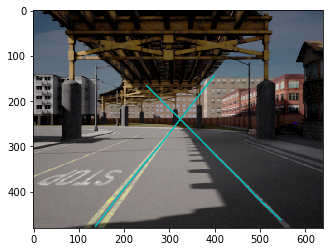

In [4]:
plt.imshow(img)
plt.plot(lane_left[:, 0], lane_left[:, 1], '-c')
plt.plot(lane_right[:, 0], lane_right[:, 1], '-c')

The lane lines for this case can be defined as one degree polynomial of the form $y = mx  + c$

The two lines will intersect at $x = x_{i}$ and $y = y_{i}$

$$
    m_{1}x_{i} + c_{1} = m_{2}x_{i} + c_{2}
$$

$$
    x_{i} = \frac{c_{2} - c_{1}}{m_{1} - m_{2}}
$$

$$
    y_{i} = m_{1}x_{i} + c_{1} 
$$
$$
or
$$
$$
    y_{i} = m_{2}x_{i} + c_{2}
$$

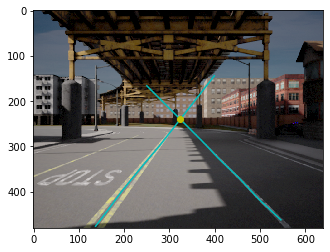

In [5]:
import sys
sys.path.append('../../code')
from solutions.camera_calibration.calibration import get_intersection

x_i, y_i = get_intersection(lane_left, lane_right)

plt.plot(lane_left[:, 0], lane_left[:, 1], '-c')
plt.plot(lane_right[:, 0], lane_right[:, 1], '-c')
plt.plot(x_i, y_i, 'oy')
plt.imshow(img)

In [9]:
from util.camera_util import get_intrinsic_matrix

fov, width, height = 90, 640, 480
K = get_intrinsic_matrix(fov, width, height)

In [10]:
from solutions.camera_calibration.calibration import get_py_from_vp

pitch, yaw = get_py_from_vp(x_i, y_i, K)

In [11]:
print(f'yaw degrees: {np.rad2deg(yaw)}')
print(f'pitch degrees: {np.rad2deg(pitch)-90}')

yaw degrees: 0.5714008123273923
pitch degrees: 0.061003903250920644


Looks good! You can expect small errors in yaw and pitch because small errors in lane detection can lead to large errors for the vanishing point. Therefore, the readings are mostly taken for a period of time and averaged out at the end. 


# Exercise

Now your task is to do the same thing. We provide you with one video. Your task is to use the lane detection network to calibrate the camera and output the yaw and pitch values.

the video can be found in `data` folder named `calibration_video.mp4`